In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from tqdm import tqdm

# Script

In [67]:
ofnamers = 'rsrg_gs.txt'
ofnamedm = 'idmrg_gs.txt'
N = 2
Lambdas = np.linspace(0, 3, 100)
iters = 10000

In [24]:
for l in tqdm(Lambdas):
    os.system(f'./exercise08a -N {N} -i {iters} -l {l} -o {ofnamers} -dl 2')

100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


In [63]:
for l in tqdm(Lambdas):
    os.system(f'./exercise08b -N {N} -i {iters} -l {l} -o {ofnamedm} -dl 2')

100%|██████████| 10/10 [07:34<00:00, 45.40s/it]


# Real Space RG

## Read data

In [46]:
datars = pd.read_csv(ofnamers, names=['N', 'iter', 'lambda', 'gs'], delim_whitespace=True)
datars['gs_norm'] = datars['gs'] / datars['N']
datars

,N,iter,lambda,gs,gs_norm
0,4,100,0.000000,-4.000000,-1.000000
1,4,100,0.061224,-4.003402,-1.000851
2,4,100,0.122449,-4.013658,-1.003415
3,4,100,0.183673,-4.030858,-1.007715
4,4,100,0.244898,-4.055117,-1.013779
...,...,...,...,...,...
595,4,4,2.878788,-11.855874,-2.963969
596,4,4,2.909091,-11.973478,-2.993370
597,4,4,2.939394,-12.091158,-3.022790
598,4,4,2.969697,-12.208912,-3.052228


In [72]:
def bound(l):
    if(l >= -2 and l <= 2):
        return (-1 -l**2/4)
    else:
        return (-abs(l))

def bound2(l):
    x = np.linspace(0, 2*np.pi, 1000)
    return (np.min(np.cos(x)**2 + l*np.sin(x)))


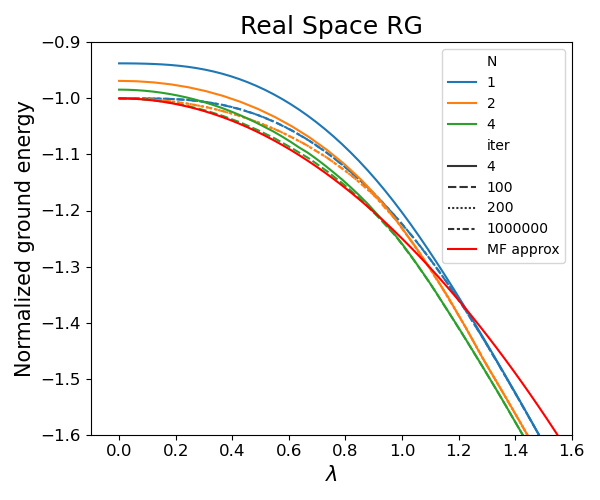

In [81]:
%matplotlib ipympl
fig, ax = plt.subplots(1, 1, figsize=(6, 5), tight_layout=True)
sns.lineplot(data=datars, x='lambda', y='gs_norm', hue='N', style='iter', palette='tab10', ax = ax, lw=1.5)
ax.set_title('Real Space RG', size=18)
ax.set_xlabel(r'$\lambda$', size=15)
ax.set_ylabel('Normalized ground energy', size=15)
ax.set_xlim(-0.1, 1.6)
ax.set_ylim(-1.6, -0.9)
ax.tick_params('both', labelsize=12)

ax.plot(Lambdas, [bound(l) for l in Lambdas], c='red', label='MF approx')
ax.legend()

In [82]:
fig.savefig('rsrg.svg')

# Infinite DM RG

## Read data

In [68]:
dataidm = pd.read_csv(ofnamedm, names=['N', 'iter', 'lambda', 'gs'], delim_whitespace=True)
dataidm['gs_norm'] = dataidm['gs'] / (2*(dataidm['N']+ dataidm['iter']))
dataidm

,N,iter,lambda,gs,gs_norm
0,1,100,0.000000,-203.000000,-1.004950
1,1,100,0.030303,-203.000605,-1.004953
2,1,100,0.060606,-202.999578,-1.004948
3,1,100,0.090909,-202.993226,-1.004917
4,1,100,0.121212,-202.974955,-1.004827
...,...,...,...,...,...
345,2,10000,1.666667,-37235.040261,-1.861380
346,2,10000,2.000000,-43206.459071,-2.159891
347,2,10000,2.333333,-49390.241804,-2.469018
348,2,10000,2.666667,-55702.763998,-2.784581


## Plot

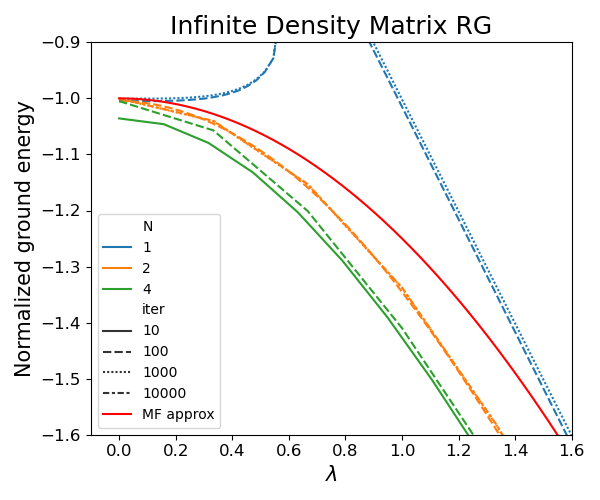

In [85]:
%matplotlib ipympl
fig, ax = plt.subplots(1, 1, figsize=(6, 5), tight_layout=True)
sns.lineplot(data=dataidm, x='lambda', y='gs_norm', hue='N', style='iter', palette='tab10', ax = ax, lw=1.5)
ax.set_title('Infinite Density Matrix RG', size=18)
ax.set_xlabel(r'$\lambda$', size=15)
ax.set_ylabel('Normalized ground energy', size=15)
ax.set_xlim(-0.1, 1.6)
ax.set_ylim(-1.6, -0.9)
ax.tick_params('both', labelsize=12)

ax.plot(Lambdas, [bound(l) for l in Lambdas], c='red', label='MF approx')
ax.legend()

In [86]:
fig.savefig('dmrg.svg')

# All together

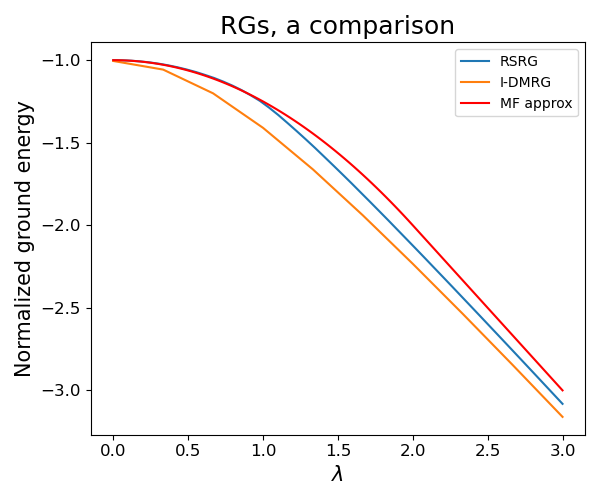

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5), tight_layout=True)

datars_filter = datars[(datars['N']==4) & (datars['iter']==100)]
dataidm_filter = dataidm[(dataidm['N']==4) & (dataidm['iter']==100)]

ax.plot(datars_filter['lambda'], datars_filter['gs_norm'], c='tab:blue', label='RSRG')
ax.plot(dataidm_filter['lambda'], dataidm_filter['gs_norm'], c='tab:orange', label='I-DMRG')
ax.plot(Lambdas, [bound(l) for l in Lambdas], c='red', label='MF approx')

ax.set_title('RGs, a comparison', size=18)
ax.set_xlabel(r'$\lambda$', size=15)
ax.set_ylabel('Normalized ground energy', size=15)
#ax.set_ylim(-1.7, -0.9)
#ax.set_xlim(-0.1, 1.5)
ax.tick_params('both', labelsize=12)

ax.legend()

In [88]:
fig.savefig('rgcomp.svg')